In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("netflix1 (2).csv")

In [4]:
print(df.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [5]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dropna(subset=['director', 'country'],
inplace=True)

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [9]:
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [10]:
# Count of content type
type_counts = df['type'].value_counts()
print("\nCount of Content Type:\n")
print(type_counts)



Count of Content Type:

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


C:\Users\ankic\AppData\Local\Temp\ipykernel_21656\2414979428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


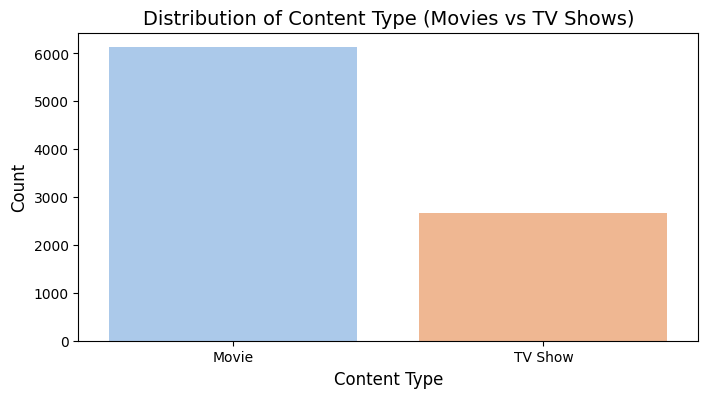

Text(0.5, 0.98, 'Percentage Distribution of Content Type')

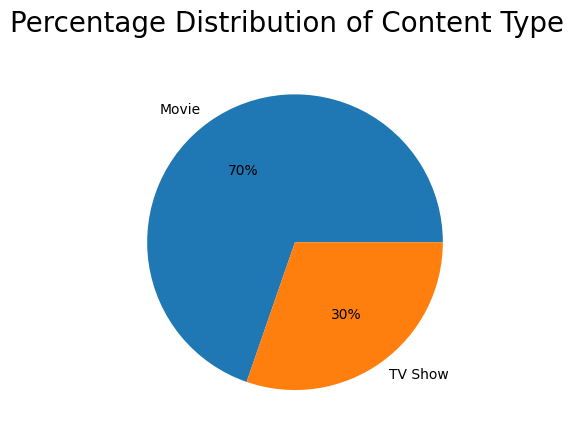

In [11]:
# Distribution of content type
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Distribution of Content Type (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
plt.pie(type_counts, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Percentage Distribution of Content Type', fontsize=20)



Top 10 Countries with Most Content:

          Country  Count
0   United States   3240
1           India   1057
2  United Kingdom    638
3        Pakistan    421
4       Not Given    287
5          Canada    271
6           Japan    259
7     South Korea    214
8          France    213
9           Spain    182


C:\Users\ankic\AppData\Local\Temp\ipykernel_21656\142432261.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=country_table, palette='pastel')


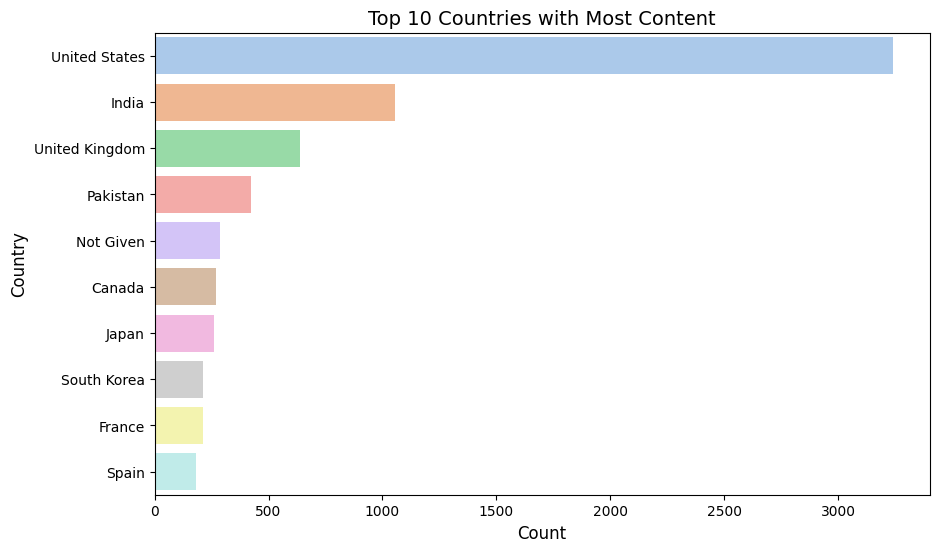

In [12]:
# Top 10 countries with most content
country_counts = df['country'].value_counts().head(10)
print("\nTop 10 Countries with Most Content:\n")
country_table = country_counts.reset_index()
country_table.columns = ['Country', 'Count']
print(country_table)
    
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Country', data=country_table, palette='pastel')
plt.title('Top 10 Countries with Most Content', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

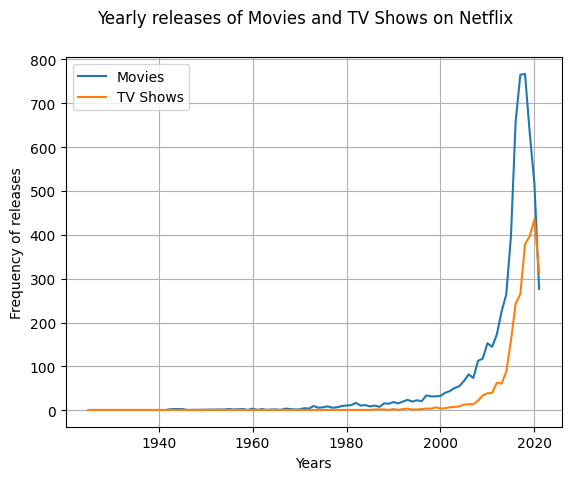

In [13]:
yearly_movie_releases=df[df['type']=='Movie']['release_year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['release_year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index,yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

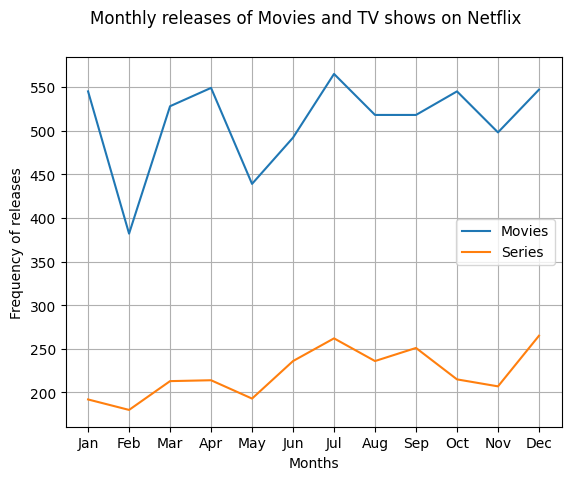

In [14]:
#Monthly releases of Movies and TV shows on Netflix
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index,monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May',
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

In [15]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Ratings on Netflix')

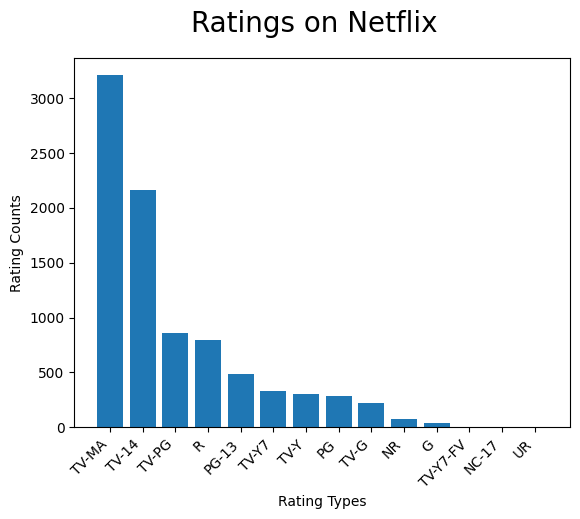

In [16]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.bar(ratings['rating'], ratings['count'],)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Counts")
plt.suptitle('Ratings on Netflix', fontsize=20)


Top 5 Genres for Movies:

                  Genre  Count
0  International Movies   2752
1                Dramas   2426
2              Comedies   1674
3         Documentaries    869
4    Action & Adventure    859


C:\Users\ankic\AppData\Local\Temp\ipykernel_21656\2014002489.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_table, palette='magma')


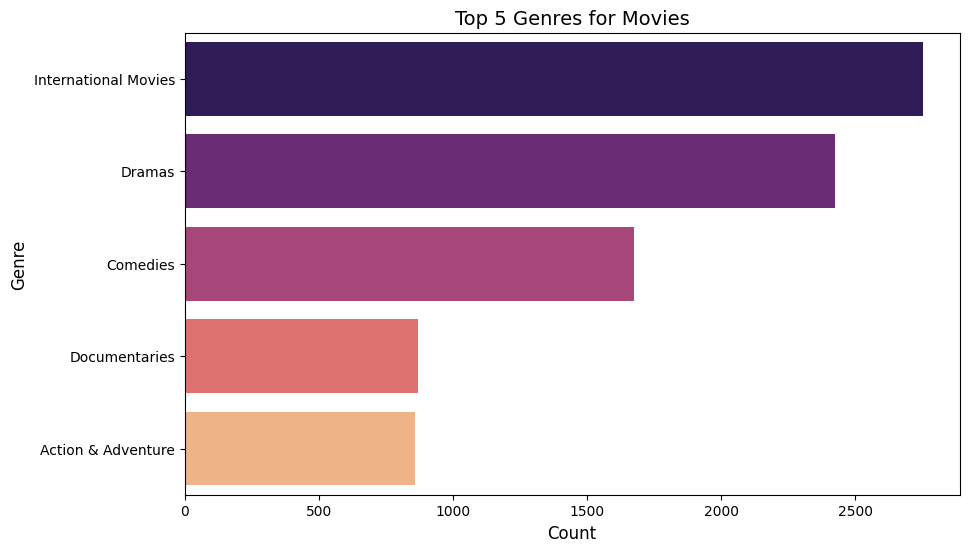

In [17]:
 #Top 5 genres for movies
df['listed_in'] = df['listed_in'].fillna('Unknown')
movie_genres = df[df['type'] == 'Movie']['listed_in'].str.split(', ').explode()
top_genres = movie_genres.value_counts().head(5)
print("\nTop 5 Genres for Movies:\n")
genre_table = top_genres.reset_index()
genre_table.columns = ['Genre', 'Count']
print(genre_table)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_table, palette='magma')
plt.title('Top 5 Genres for Movies', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()



Top 5 Genres for TV Shows:

                    Genre  Count
0  International TV Shows   1349
1               TV Dramas    762
2             TV Comedies    573
3          Crime TV Shows    469
4                Kids' TV    448


C:\Users\ankic\AppData\Local\Temp\ipykernel_21656\448630825.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=tv_genre_table, palette='coolwarm')


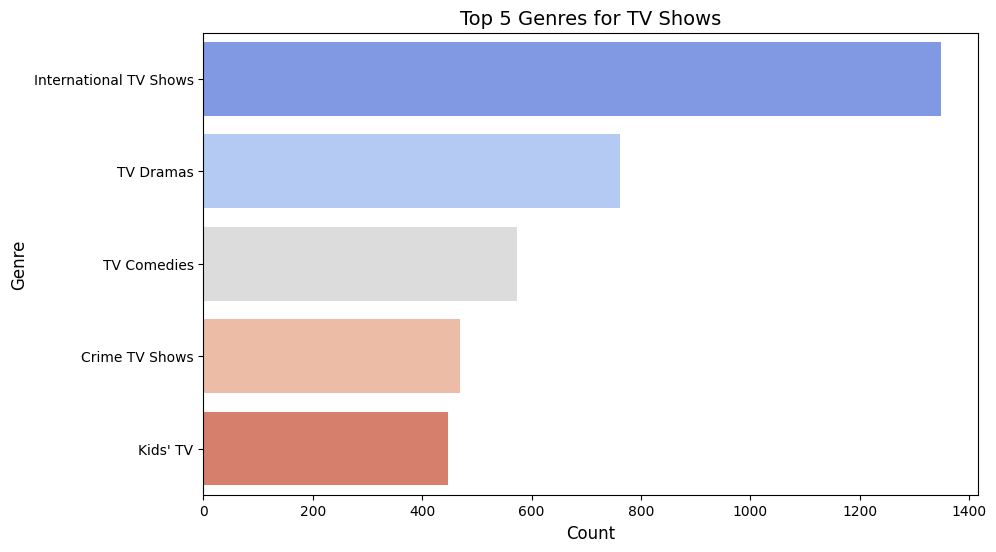

In [18]:
 # Top 5 genres for TV shows
tv_genres = df[df['type'] == 'TV Show']['listed_in'].str.split(', ').explode()
top_tv_genres = tv_genres.value_counts().head(5)
print("\nTop 5 Genres for TV Shows:\n")
tv_genre_table = top_tv_genres.reset_index()
tv_genre_table.columns = ['Genre', 'Count']
print(tv_genre_table)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=tv_genre_table, palette='coolwarm')
plt.title('Top 5 Genres for TV Shows', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ankic\AppData\Local\Temp\ipykernel_21656\1100617484.py:5: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
C:\Users\ankic\AppData\Local\Temp\ipykernel_21656\1100617484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


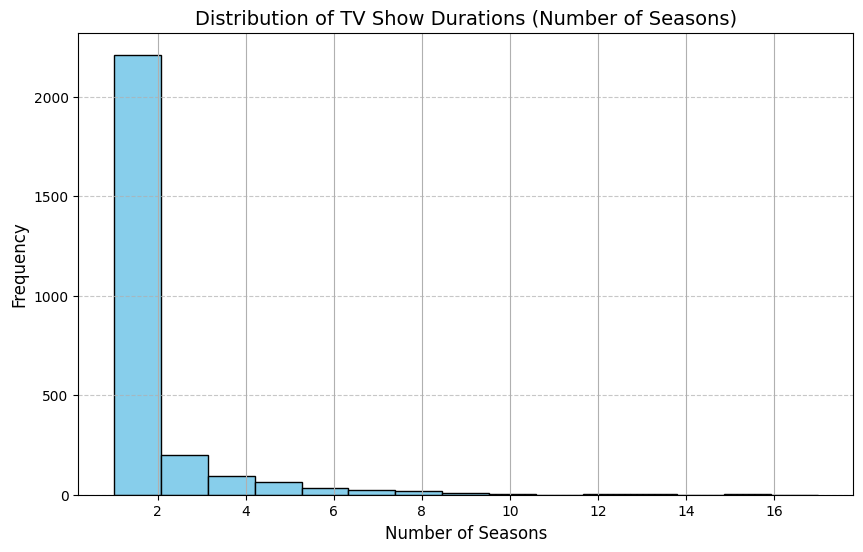

In [19]:
# Filter data for TV shows
tv_shows = df[df['type'] == 'TV Show']

# Extract numeric values from the 'duration' column
tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Plot the distribution of seasons
plt.figure(figsize=(10, 6))
tv_shows['num_seasons'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of TV Show Durations (Number of Seasons)', fontsize=14)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\ankic\AppData\Local\Temp\ipykernel_21656\3035858389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_numeric'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)


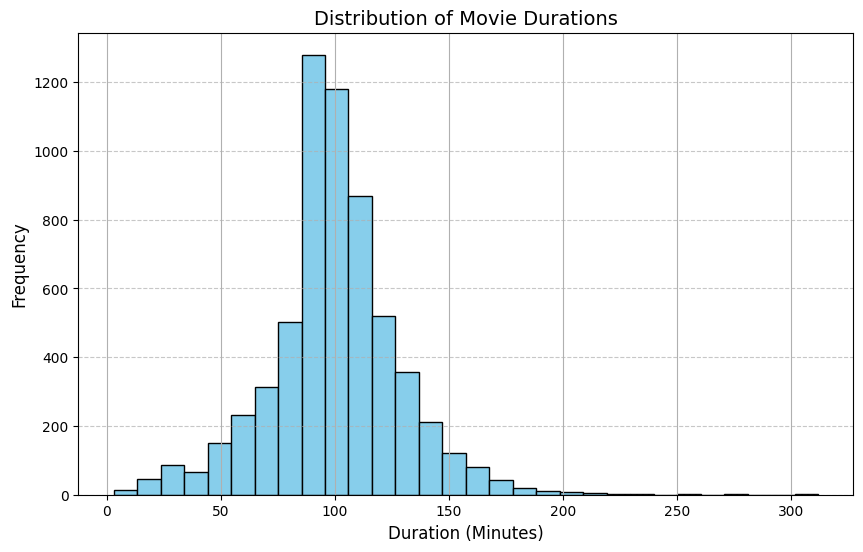

In [20]:
# Filter data for movies
movies = df[df['type'] == 'Movie']

# Extract numeric values from the 'duration' column for movies
movies['duration_numeric'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# Plot the distribution of movie durations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
movies['duration_numeric'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations', fontsize=14)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [21]:
# Remove rows with missing or "not given" values in the 'director' column
data_cleaned = df[(df['director'].notna()) & (df['director'] != "not given")]
print(data_cleaned["director"].isnull().sum())

0


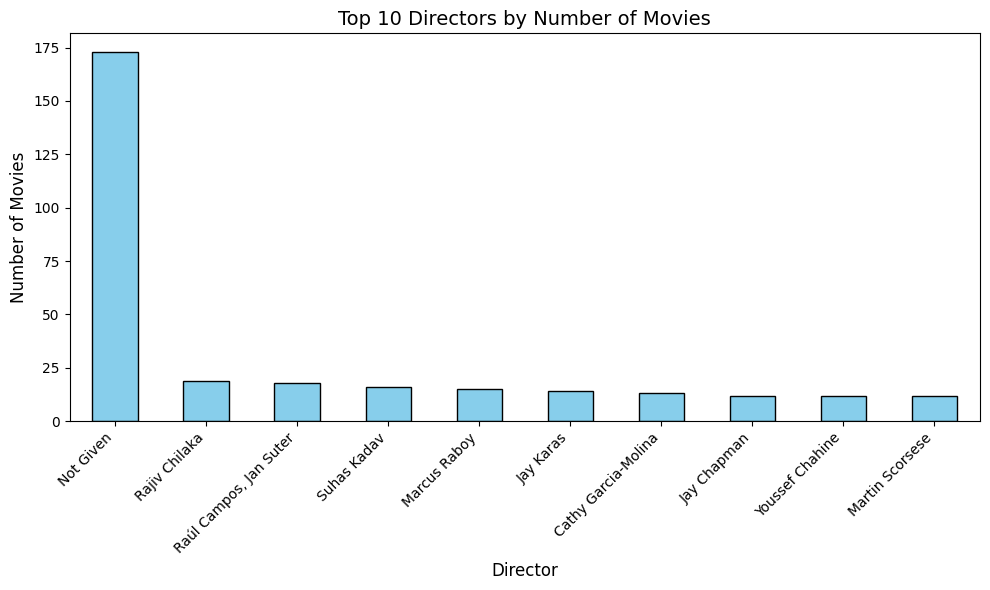

In [22]:
# Filter for movies only
movies_data = data_cleaned[data_cleaned['type'] == 'Movie']

# Count the number of movies per director
director_movie_counts = movies_data['director'].value_counts()

# Get the top 10 directors
top_10_movie_directors = director_movie_counts.head(10)

# Visualize the data
plt.figure(figsize=(10, 6))
top_10_movie_directors.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Directors by Number of Movies', fontsize=14)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [23]:
# Remove rows with missing or "not given" values in the 'director' column
data_cleaned = df[(df['director'].notna()) & (df['director'] != "not given")]
print(data_cleaned["director"].isnull().sum())

0


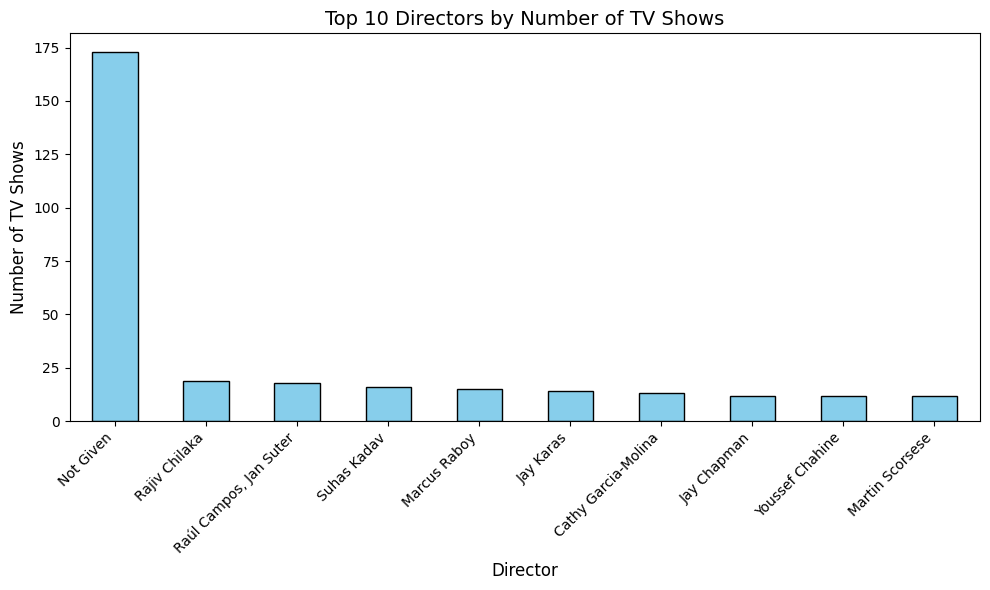

In [24]:
# Filter for tv shows only
tv_shows_data = data_cleaned[data_cleaned['type'] == 'Movie']

# Count the number of tv shows per director
director_tv_shows_counts = tv_shows_data['director'].value_counts()

# Get the top 10 directors
top_10_tv_shows_directors = director_tv_shows_counts.head(10)

# Visualize the data
plt.figure(figsize=(10, 6))
top_10_tv_shows_directors.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Directors by Number of TV Shows', fontsize=14)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()